In [1]:
import numpy as np

A = np.array([[ 3., -2.,  0.,  0.],
              [-2.,  4., -2.,  0.],
              [ 0., -2.,  6., -4.],
              [ 0.,  0., -4.,  4.]])

b = np.array([0,2,1,8])
u_vec = np.array([0,0,0,0.])
omega = 1.7


def MySOR(A,b,omega,u_vec):
    residual_convergence = 1e-10
    residual = np.linalg.norm(np.dot(A, u_vec) - b) #Initial residual
    iter_count = 0
   
    while residual > residual_convergence:
        iter_count+=1
        for i in range(4):
            sigma_i = 0
            for j in range(4):
                if j < i: # lower triangle elements
                    sigma_i += A[i][j] * u_vec[j]
                if j > i: # upper traignel elements
                    sigma_i += A[i][j] * u_vec[j]
            u_vec[i] = (1. - omega) * u_vec[i]  + omega * 1./A[i][i] * ( b[i] - sigma_i)
        #swap 
        residual = np.linalg.norm(np.dot(A, u_vec) - b)
    return [u_vec,residual,iter_count]


[u_vec,residual,iter_count] = MySOR(A,b,omega,u_vec)
print ("res = {:5.2e}".format(residual))
print ("u_vec = {}".format(u_vec))
print ("iter_count = {}".format(iter_count))




res = 9.68e-11
u_vec = [11.  16.5 21.  23. ]
iter_count = 74


In [34]:
# Input parameters
import numpy as np
import matplotlib.pyplot as plt


def FindBallPosition(k_vec, l_vec,mg_vec):
    k_01,k_12,k_23,k_34 = k_vec[0],k_vec[1],k_vec[2],k_vec[3] #N/m
    l_01,l_12,l_23,l_34 = l_vec[0],l_vec[1],l_vec[2],l_vec[3] #meters
    m1_g,m2_g,m3_g,m4_g = mg_vec[0],mg_vec[1],mg_vec[2],mg_vec[3] #N

    #=====
    A = np.array([[k_01+k_12, -k_12, 0,  0.],
                  [-k_12, k_12+k_23, -k_23, 0],
                  [0, -k_23, k_23+k_34, -k_34],
                  [ 0.,  0., -k_34, k_34]])


    #===b_vec
    b1 = m1_g + k_01 * l_01 - k_12 * l_12
    b2 = m2_g + k_12 * l_12 - k_23 * l_23
    b3 = m3_g + k_23 * l_23 - k_34 * l_34
    b4 = m4_g + k_34 * l_34
    b_vec = np.array([b1, b2, b3, b4])

    y_vec = np.array([100., 100., -1., 200.])
    [y_vec,residual,iter_count] = MySOR(A,b_vec,omega,y_vec)
    return y_vec
   
    
#=====
k_vec = np.array([0.1,1.,1.,1.,])  # N/m
l_vec = np.array([1.,1.,1.,1.,]) # m
mg_vec = np.array([0.1,0.001,0.1,10.]) # N
#==
y_vec = FindBallPosition(k_vec, l_vec,mg_vec)
print ("y_vec = {}".format(y_vec))

x_vec = np.array([0.,0.,0.,0.])
y_original =  np.array([1.,2.,3.,4.])
    



y_vec = [103.01  114.111 125.211 136.211]


[1. 2. 3. 4.]
[103.01  114.111 125.211 136.211]


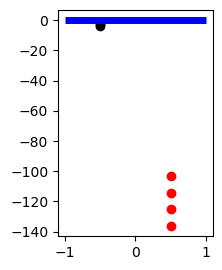

In [35]:


fig = plt.figure( dpi = 100 )
fig.set_size_inches(2,3)

plt.plot(x_vec +0.5,-y_vec,'ro')
plt.plot(x_vec - 0.5 , -y_original, 'ko')

plt.hlines(0, -1, 1, colors='b',lw = 5)



print (y_original)

print (y_vec)

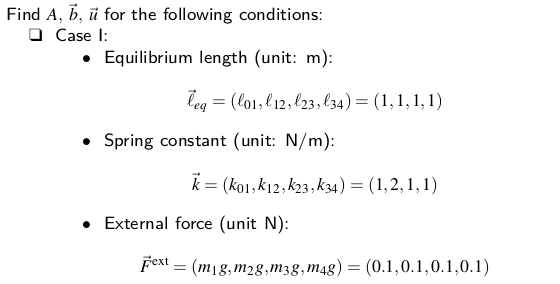

In [27]:
print (y_vec)

[5.  6.3 7.5 8.6]


In [36]:
y_vec = np.insert(y_vec, 0, 0)
y_original =  np.insert(y_original, 0, 0)




Text(0, 0.5, '$\\epsilon_{yy}$')

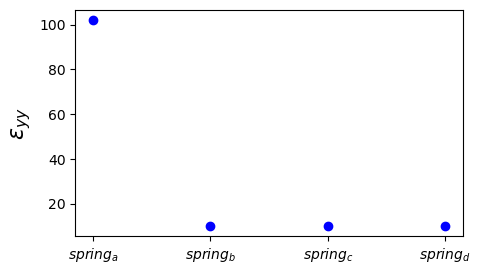

In [37]:
#y_original = np.array([0,1,2,3,4])
#y_vec = np.array([0,1.4, 2.7, 3.9, 5. ])


L0 = y_original[1:]- y_original[:-1]
L = y_vec[1:]- y_vec[:-1]
#print (L0)
#print (L)
strain_yy = (L - L0)/L0



fig = plt.figure( dpi = 100 )
fig.set_size_inches(5,3)

Spring_ID =  [0,1,2,3]
plt.plot(Spring_ID,strain_yy,'bo')
plt.xticks(Spring_ID, (r'$spring_{a}$', r'$spring_{b}$', r'$spring_{c}$', r'$spring_{d}$'))
plt.ylabel(r'$\epsilon_{yy}$', fontsize = 16)

#plt.ylim(0,0.5)



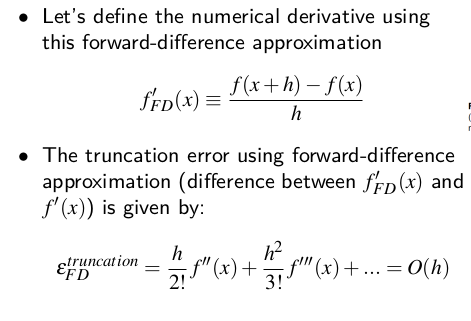

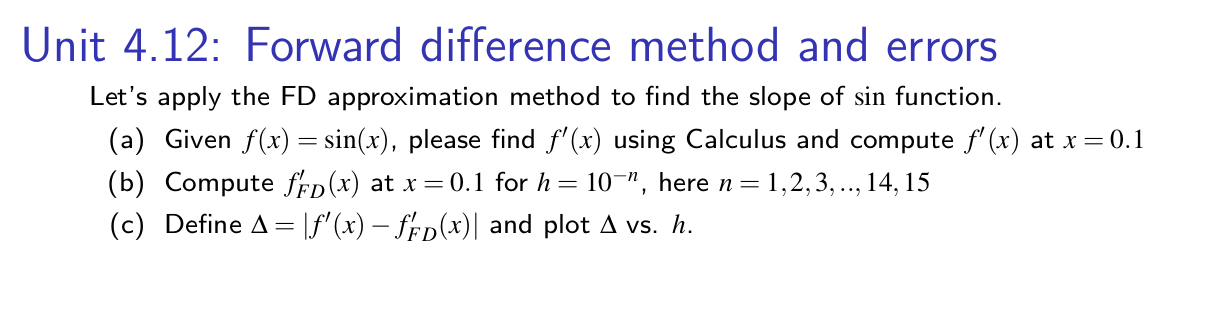

dsin/dx at x= 0.1 is 0.9950041652780258


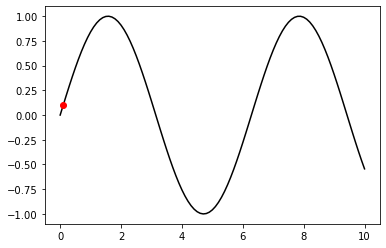

In [43]:
#(a)

import numpy as np
import matplotlib.pyplot as plt

x_arr = np.linspace(0,10,101)
plt.plot(x_arr, np.sin(x_arr),'-k')
x_0 = 0.1
plt.plot(x_0, np.sin(x_0),'ro')

f_prime = np.cos(x_0)
print ("dsin/dx at x= 0.1 is", f_prime)



[0.98835914 0.99448842 0.99495408 0.99499917 0.99500367 0.99500412
 0.99500416 0.99500417 0.99500416 0.99500408 0.99500408 0.99500963
 0.99503739 0.99642516 0.99920072]


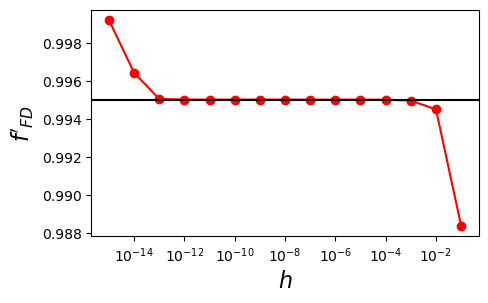

In [49]:
#(b)FD approximation

def MY_FD_Diff(x_0, h):
    f_a = np.sin(x_0)
    f_b = np.sin(x_0 + h)
    f_prime_FD= (f_b - f_a)/h 
    return f_prime_FD

n_arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
h_arr = 10.** np.array(-n_arr) #...
f_prime_FD = MY_FD_Diff(x_0, h_arr)
print (f_prime_FD)
#0.9950041652780258  


fig = plt.figure(dpi = 100)
fig.set_size_inches(5,3)

plt.plot(h_arr, f_prime_FD, '-or')
plt.axhline(y=f_prime, color='k', linestyle='-')
plt.xlabel(r"$h$", fontsize = 16)
plt.ylabel(r"$f'_{FD}$", fontsize = 16)
plt.xscale('log')

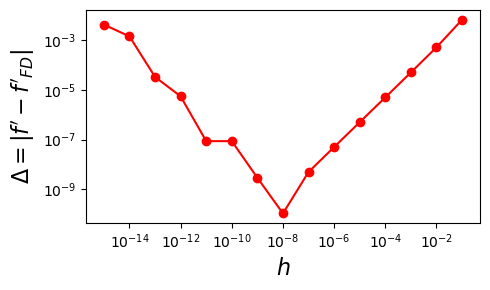

In [53]:
#(c)

Delta = abs(f_prime_FD - f_prime)

fig = plt.figure(dpi = 100)
fig.set_size_inches(5,3)
plt.plot(h_arr, Delta, '-or')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"$h$", fontsize = 16)
plt.ylabel(r"$\Delta = |f' - f'_{FD}|$", fontsize = 16)
#ax = plt.gca() 
#ax.tick_params('both', labelsize = 16 , length = 5)
#ax.tick_params(width = 1, length = 5)
plt.tight_layout()







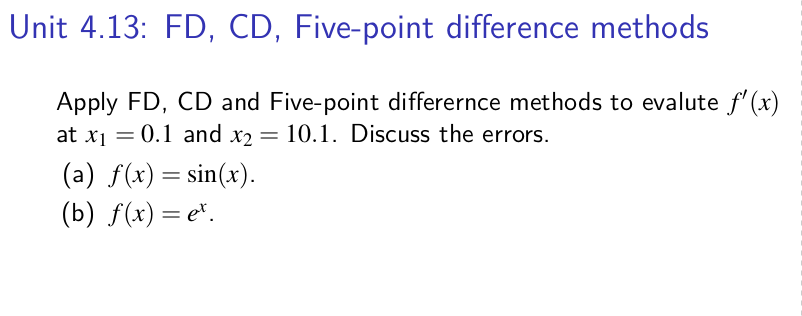


[0.98835914 0.99448842 0.99495408 0.99499917 0.99500367 0.99500412
 0.99500416 0.99500417 0.99500416 0.99500408 0.99500408 0.99500963
 0.99503739 0.99642516 0.99920072]
[0.99458963 0.99500002 0.99500412 0.99500416 0.99500417 0.99500417
 0.99500417 0.99500417 0.99500416 0.99500422 0.99500408 0.99500963
 0.99503739 0.99364961 0.99920072]
[0.99500415 0.99500417 0.99500417 0.99500417 0.99500417 0.99500417
 0.99500417 0.99500417 0.9950042  0.9950044  0.99500408 0.99497262
 0.99466731 0.99364961 0.99920072]


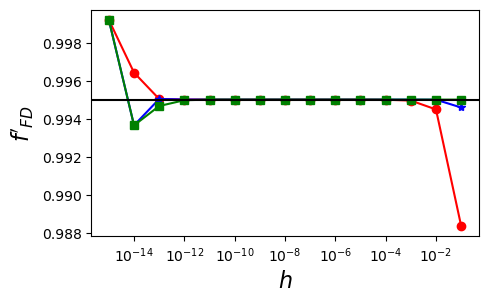

In [60]:
#(b)FD approximation

def MY_FD_Diff(x_0, h):
    f_a = np.sin(x_0)
    f_b = np.sin(x_0 + h)
    f_prime_FD= (f_b - f_a)/h 
    return f_prime_FD


def MY_CD_Diff(x_0, h):
    f_a = np.sin(x_0 - h/2.)
    f_b = np.sin(x_0 + h/2.)
    f_prime_CD= (f_b - f_a)/h 
    return f_prime_CD



def MY_FivePoint_Diff(x_0,h):
    A = np.sin(x_0+ 0.5*h) - np.sin(x_0 - 0.5 *h)
    B = np.sin(x_0 + 0.25*h) - np.sin(x_0 - 0.25 *h)
    ans = (8. * B - A)/(3. *h)
    return ans


n_arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
h_arr = 10.** np.array(-n_arr) #...
f_prime_FD = MY_FD_Diff(x_0, h_arr)
print (f_prime_FD)

f_prime_CD = MY_CD_Diff(x_0, h_arr)
print (f_prime_CD)


f_prime_5p = MY_FivePoint_Diff(x_0, h_arr)
print (f_prime_5p)


#0.9950041652780258  


fig = plt.figure(dpi = 100)
fig.set_size_inches(5,3)

plt.plot(h_arr, f_prime_FD, '-or')
plt.plot(h_arr, f_prime_CD, '-b*')
plt.plot(h_arr, f_prime_5p, '-gs')
plt.axhline(y=f_prime, color='k', linestyle='-')
plt.xlabel(r"$h$", fontsize = 16)
plt.ylabel(r"$f'_{FD}$", fontsize = 16)
plt.xscale('log')



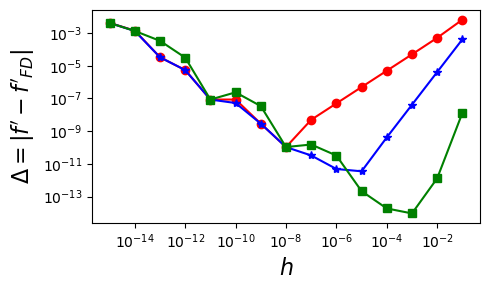

In [61]:
#(c)

Delta_FD = abs(f_prime_FD - f_prime)
Delta_CD = abs(f_prime_CD - f_prime)
Delta_5p = abs(f_prime_5p - f_prime)


fig = plt.figure(dpi = 100)
fig.set_size_inches(5,3)
plt.plot(h_arr, Delta_FD, '-or')
plt.plot(h_arr, Delta_CD, '-b*')
plt.plot(h_arr, Delta_5p, '-gs')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"$h$", fontsize = 16)
plt.ylabel(r"$\Delta = |f' - f'_{FD}|$", fontsize = 16)
#ax = plt.gca() 
#ax.tick_params('both', labelsize = 16 , length = 5)
#ax.tick_params(width = 1, length = 5)
plt.tight_layout()





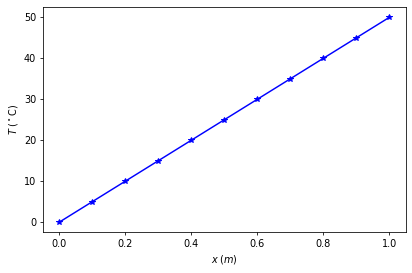

In [62]:
import numpy as np
import matplotlib.pyplot as plt

T_air, T_low, T_high = 30.0, 0.0, 50.0  # degrees
alpha = 1.
Lx = 1. # meters
x_arr = np.linspace(0,Lx,11)
T_arr = 50. * x_arr 

fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(x_arr, T_arr,'-b*',label = 'analytic solution')
plt.xlabel(r'$x\;(m)$')
plt.ylabel(r'$T\; ({\rm ^\circ C})$')

plt.tight_layout()
plt.savefig("Unit_4.14a_1d_beta_0.png")


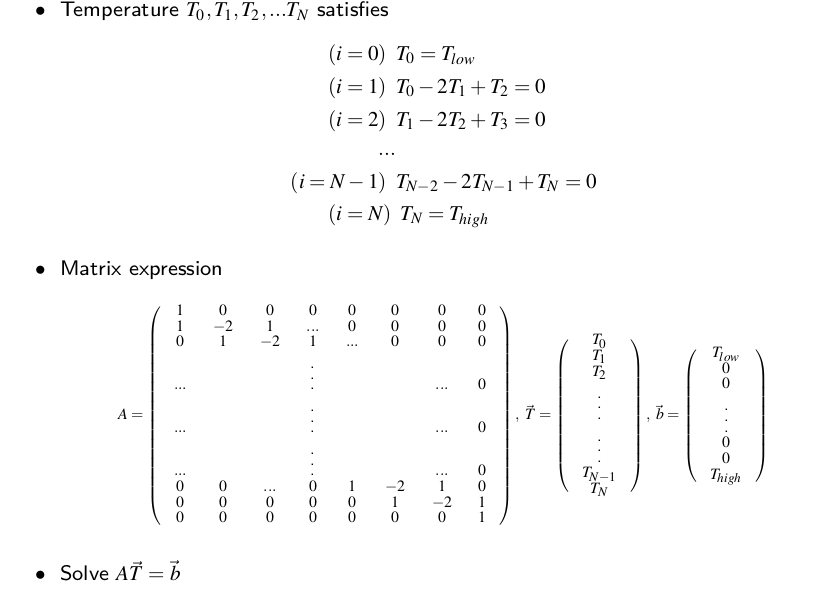


In [1]:
import numpy as np

A = np.array([[ 1., 0.,  0.,  0., 0.],
              [1.,  -2., 1.,  0., 0.],
              [ 0., 1.,  -2., 1., 0.],
              [ 0.,  0., 1.,  -2., 1.],
              [ 0.,  0., 0.,  0., 1.]])
T_low = 0.
T_high = 50.
b = np.array([T_low,0.,0.,0.,T_high])
u_vec = np.array([0,10,20,30.,50.])

print (A)

[[ 1.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  1.]]


In [ ]:
print (A)